# Projet 5GMM

## Les donnéées

1:50: Average, standard deviation, min, max and median of the attributes 51...60 for the source of the current blog post

51: Total number of comments before basetime 

52: Number of comments in the last 24 hours before the basetime 

53: Let T1 denote the datetime 48 hours before basetime, let T2 denote the datetime 24 hours before basetime. This attribute is the number of comments in the time period between T1 and T2 

54: Number of comments in the first 24 hours after the publication of the blog post, but before basetime 

55: The difference of Attribute 52 and Attribute 53 

56...60: The same features as the attributes 51...55, but features 56...60 refer to the number of links (trackbacks), while features 51...55 refer to the number of comments. 

61: The length of time between the publication of the blog post and basetime 

62: The length of the blog post 

63...262: The 200 bag of words features for 200 frequent words of the text of the blog post 

263...269: binary indicator features (0 or 1) for the weekday (Monday...Sunday) of the basetime 

270...276: binary indicator features (0 or 1) for the weekday (Monday...Sunday) of the date of publication of the blog post 

277: Number of parent pages: we consider a blog post P as a parent of blog post B, if B is a reply (trackback) to blog post P. 

278...280: Minimum, maximum, average number of comments that the parents received 

281: The target: the number of comments in the next 24 hours (relative to basetime)

In [1]:
library(readr)
library(stringr)
library(ggplot2)
library(vcd)
library(ggparallel)
library(FactoMineR)
library(e1071)
library(corrplot)
library(glmnet)

Warning message:
"package 'readr' was built under R version 3.4.4"Warning message:
"package 'stringr' was built under R version 3.4.3"Warning message:
"package 'ggplot2' was built under R version 3.4.3"Warning message:
"package 'vcd' was built under R version 3.4.4"Loading required package: grid
Warning message:
"package 'ggparallel' was built under R version 3.4.4"Warning message:
"package 'FactoMineR' was built under R version 3.4.4"Warning message:
"package 'e1071' was built under R version 3.4.4"Warning message:
"package 'corrplot' was built under R version 3.4.4"corrplot 0.84 loaded
Warning message:
"package 'glmnet' was built under R version 3.4.4"Loading required package: Matrix
Loading required package: foreach
Warning message:
"package 'foreach' was built under R version 3.4.4"Loaded glmnet 2.0-16



In [79]:
Data<-read_delim("blogData_train.csv",",",escape_double=FALSE,trim_ws=TRUE)
y<-Data[,281]

Warning message:
"Duplicated column names deduplicated: '0.0' => '0.0_1' [8], '0.0' => '0.0_2' [13], '377.0' => '377.0_1' [14], '0.0' => '0.0_3' [18], '377.0' => '377.0_2' [24], '0.0' => '0.0_4' [25], '0.0' => '0.0_5' [28], '0.0' => '0.0_6' [30], '0.0' => '0.0_7' [33], '0.0' => '0.0_8' [35], '0.0' => '0.0_9' [38], '9.0' => '9.0_1' [39], '0.0' => '0.0_10' [40], '0.0' => '0.0_11' [43], '0.0' => '0.0_12' [45], '9.0' => '9.0_2' [49], '0.0' => '0.0_13' [50], '2.0' => '2.0_1' [51], '2.0' => '2.0_2' [52], '0.0' => '0.0_14' [53], '2.0' => '2.0_3' [54], '2.0' => '2.0_4' [55], '0.0' => '0.0_15' [56], '0.0' => '0.0_16' [57], '0.0' => '0.0_17' [58], '0.0' => '0.0_18' [59], '0.0' => '0.0_19' [60], '10.0' => '10.0_1' [61], '0.0' => '0.0_20' [62], '0.0' => '0.0_21' [63], '0.0' => '0.0_22' [64], '0.0' => '0.0_23' [65], '0.0' => '0.0_24' [66], '0.0' => '0.0_25' [67], '0.0' => '0.0_26' [68], '0.0' => '0.0_27' [69], '0.0' => '0.0_28' [70], '0.0' => '0.0_29' [71], '0.0' => '0.0_30' [72], '0.0' => '0.0_31'

In [83]:
sequence<-seq(1,281)
sequence<-as.character(sequence)
typeof(Data)
Data<-as.data.frame(Data, col.names=sequence)
typeof(Data)
Data

[1] "list"

[1] "list"

40.30467,53.845657,0.0,401.0,15.0,15.52416,32.44188,0.0_1,377.0,3.0,...,0.0_229,1.0_1,0.0_230,0.0_231,0.0_232,0.0_233,0.0_234,0.0_235,0.0_236,1.0_2
40.30467,53.84566,0,401,15,15.52416,32.44188,0,377,3,...,1,0,0,0,0,0,0,0,0,0
40.30467,53.84566,0,401,15,15.52416,32.44188,0,377,3,...,1,0,0,0,0,0,0,0,0,0
40.30467,53.84566,0,401,15,15.52416,32.44188,0,377,3,...,0,1,0,0,0,0,0,0,0,1
40.30467,53.84566,0,401,15,15.52416,32.44188,0,377,3,...,0,1,0,0,0,0,0,0,0,27
40.30467,53.84566,0,401,15,15.52416,32.44188,0,377,3,...,1,0,0,0,0,0,0,0,0,0
40.30467,53.84566,0,401,15,15.52416,32.44188,0,377,3,...,1,0,0,0,0,0,0,0,0,0
40.30467,53.84566,0,401,15,15.52416,32.44188,0,377,3,...,0,1,0,0,0,0,0,0,0,27
40.30467,53.84566,0,401,15,15.52416,32.44188,0,377,3,...,0,1,0,0,0,0,0,0,0,9
40.30467,53.84566,0,401,15,15.52416,32.44188,0,377,3,...,0,1,0,0,0,0,0,0,0,9
40.30467,53.84566,0,401,15,15.52416,32.44188,0,377,3,...,0,0,0,1,0,0,0,0,0,0


In [46]:
y<-unlist(y, use.names=FALSE)

In [39]:
summary(y) 
quantile(y) ## la plupart des donn??es ont un petit nombres de commentaires pr??dits

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
   0.000    0.000    0.000    6.765    1.000 1424.000 

0%  25%  50%  75% 100% 
   0    0    0    1 1424

[1] 47945  1634   729   366   270   216   146   118    88    79   805

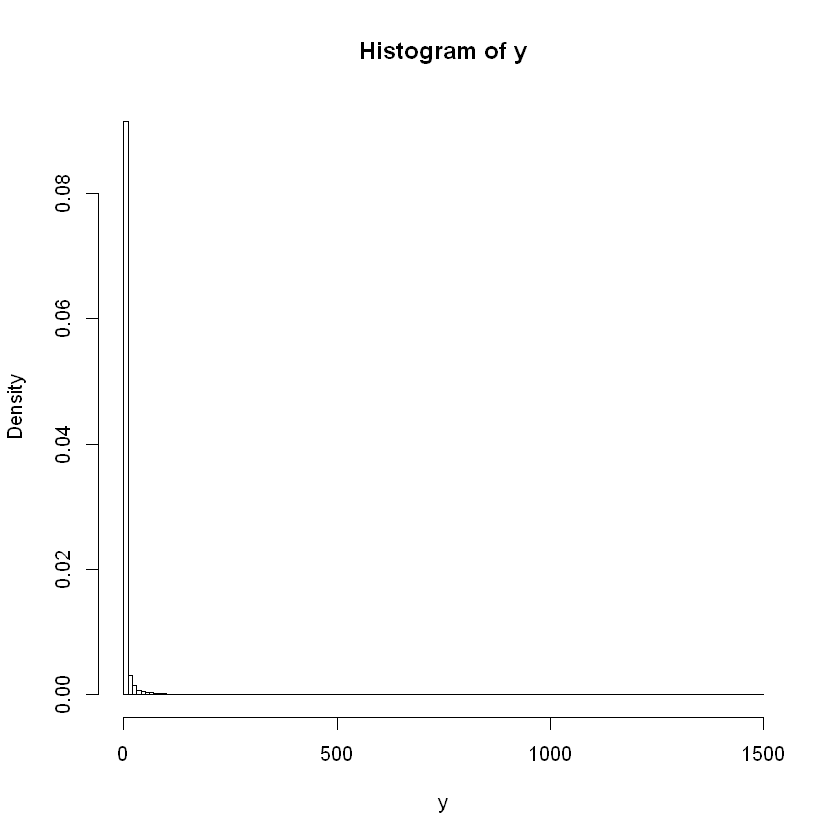

[1] 39333  2820  1654  1120   807   619   510   423   344   315  4451

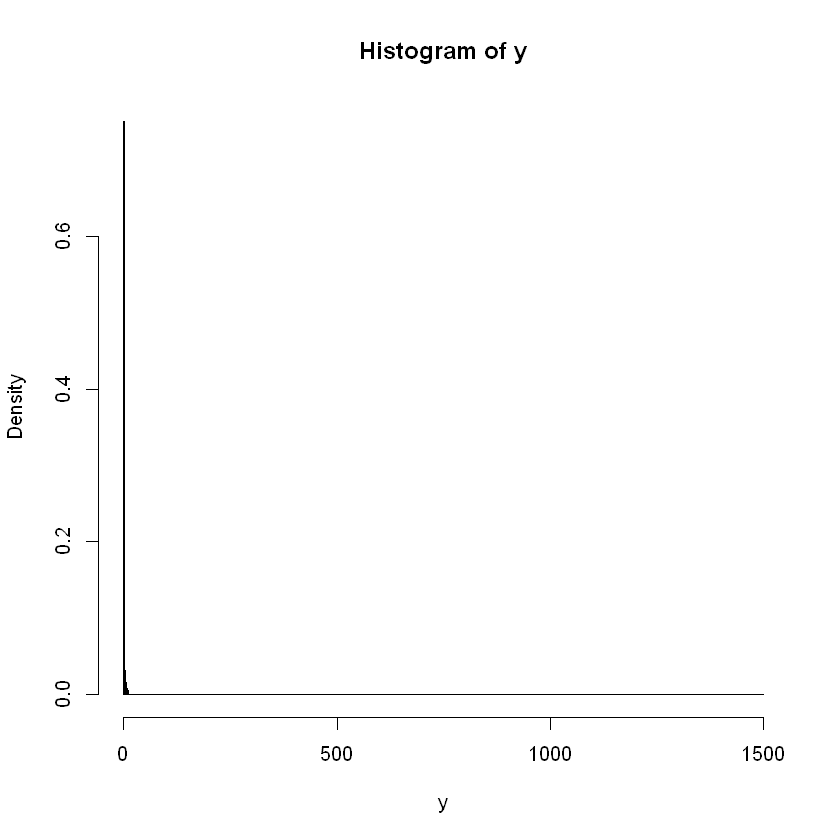

[1] 33559  5774 13063

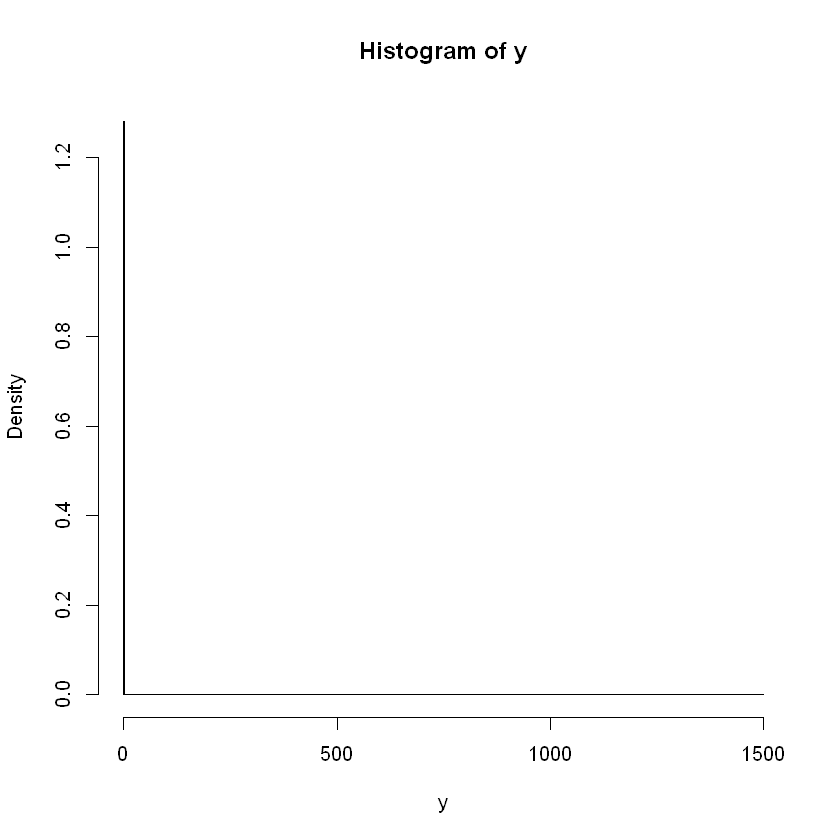

In [41]:
hist(y, breaks=c(0,10,20,30,40,50,60,70,80,90,100,1500))$counts
hist(y, breaks=c(0,1,2,3,4,5,6,7,8,9,10,1500))$counts
hist(y, breaks=c(0,0.5,1,1500))$counts # on voit que plus de 3/4 des donn??es ont 0 commentaire pr??dit 

,eigenvalue,percentage of variance,cumulative percentage of variance
comp 1,36.57,13.20,13.20
comp 2,29.70,10.72,23.92
comp 3,13.19,4.76,28.68
comp 4,6.54,2.36,31.04
comp 5,3.37,1.22,32.26
comp 6,2.99,1.08,33.34
comp 7,2.74,0.99,34.33
comp 8,2.59,0.94,35.26
comp 9,2.34,0.84,36.11
comp 10,2.17,0.78,36.89


Warning message in arrows(0, 0, coord.var[v, 1], coord.var[v, 2], length = 0.1, :
"zero-length arrow is of indeterminate angle and so skipped"Warning message in arrows(0, 0, coord.var[v, 1], coord.var[v, 2], length = 0.1, :
"zero-length arrow is of indeterminate angle and so skipped"Warning message in arrows(0, 0, coord.var[v, 1], coord.var[v, 2], length = 0.1, :
"zero-length arrow is of indeterminate angle and so skipped"Warning message in arrows(0, 0, coord.var[v, 1], coord.var[v, 2], length = 0.1, :
"zero-length arrow is of indeterminate angle and so skipped"

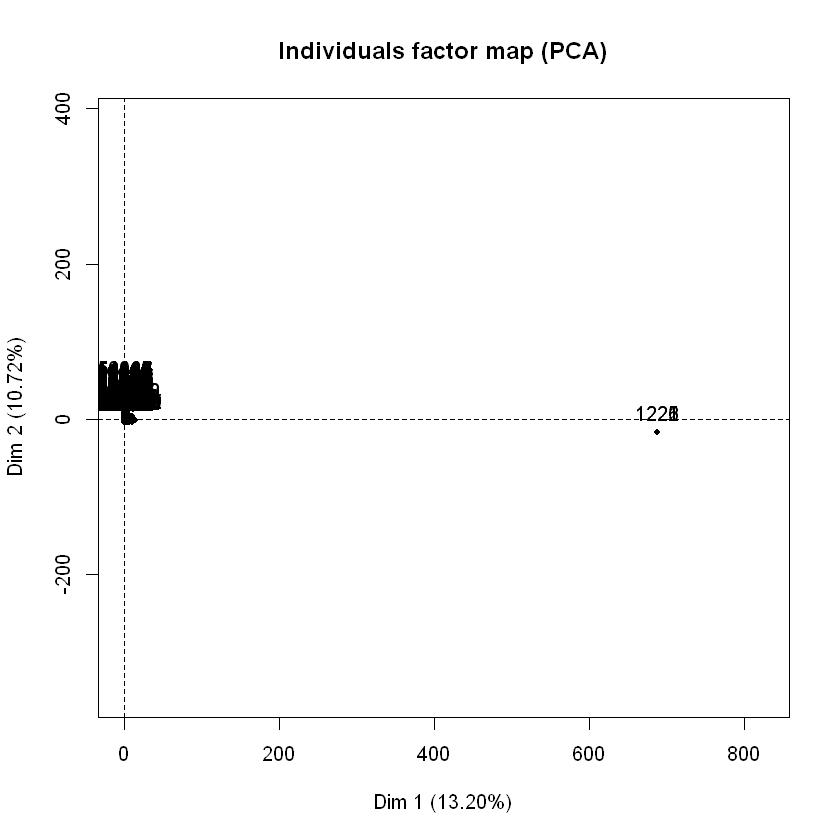

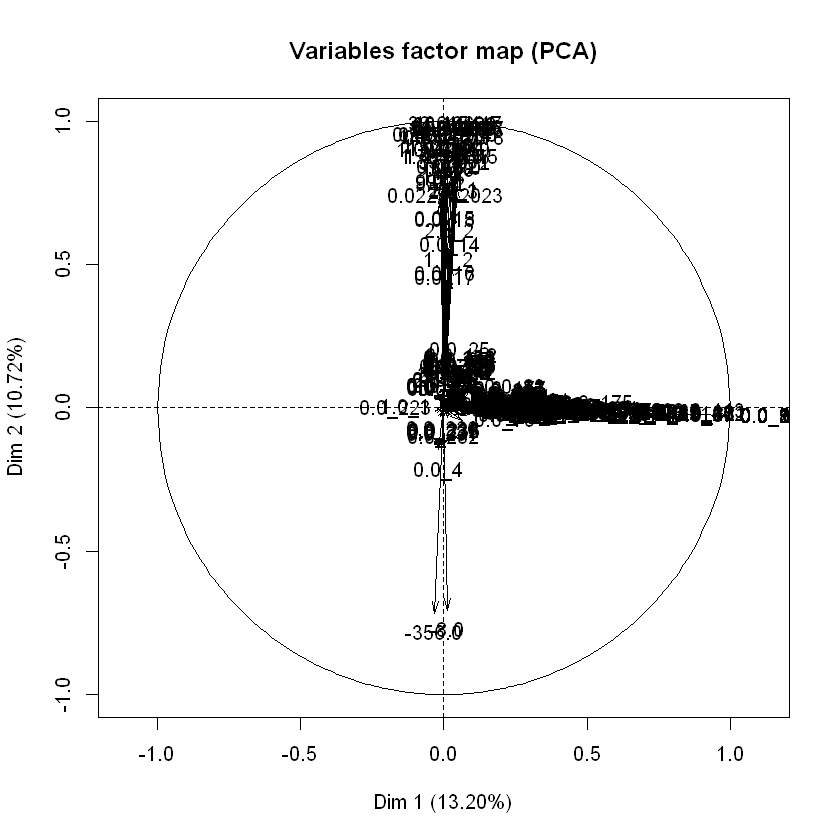

In [87]:
Data<-as.data.frame(Data)
Data.pca=PCA(Data, ncp=4, graph=F)
round(Data.pca$eig, digits=2)
plot(Data.pca, choix="ind")
plot(Data.pca, choix="var")

In [93]:
par(mfrow=c(1,2))
plot(Data.pca$eigenvalue, type = 'b', main="Ebouli des valeurs propres")
barplot(Data.pca$eigenvalue, main="Ebouli des valeurs propres", names.arg=1:nrow(Data.pca$eig))

Warning message in min(x):
"aucun argument trouvé pour min ; Inf est renvoyé"Warning message in max(x):
"aucun argument pour max ; -Inf est renvoyé"Warning message in min(x):
"aucun argument trouvé pour min ; Inf est renvoyé"Warning message in max(x):
"aucun argument pour max ; -Inf est renvoyé"

ERROR: Error in plot.window(...): 'xlim' nécessite des valeurs finies
